In [397]:
import scipy.io

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

In [398]:
PATH = 'matlab_code/P00_data_behavior'

In [399]:
pat = scipy.io.loadmat(f'{PATH}/b_data_subject_1')

In [400]:
def build_tile_df(N=20):
    dfs = []
    for i in range(N):
        pat = scipy.io.loadmat(f'{PATH}/b_data_subject_{i+1}')
        pat = pat['b_data'][0]
        match = pat[0][1].flatten()
        tile_clicked = pat[11][1].flatten()[1::2]
        board_size = pat[6][1].flatten()[1::2]
        correct_tile = pat[12][1].flatten()[1::2]
        dfs.append(pd.DataFrame({
            'match': match,
            'tile_clicked': tile_clicked-1,
            'board_size': board_size,
            'correct_tile': correct_tile-1,
            'patient': i+1,
        }))
    return pd.concat(dfs).reset_index(drop=True)

In [401]:
df = build_tile_df()

# Heatmaps

In [315]:
def plot_error_location_p(df):
    mm_df = df[df['match'] == 1]
    b_grouped = mm_df.groupby('board_size')
    for board_size, b_group in b_grouped:
        p_grouped = pd.DataFrame(b_group).groupby('patient')
        N = int(np.sqrt(board_size))
        inputs = []
        for patient, p_group in p_grouped:
            counts = np.bincount(p_group['tile_clicked'].to_numpy(), minlength=board_size)
            inputs.append(np.reshape(counts/counts.sum(), (N, N)))
        data = np.stack(inputs)
        plt.figure() 
        sns.heatmap(np.mean(data, axis=0), annot=True, cmap='magma', square=True, cbar=True, cbar_kws={'label': 'Error Frequency Mean'})
        plt.figure() 
        sns.heatmap(np.std(data, axis=0), annot=True, cmap='magma', square=True, cbar=True, cbar_kws={'label': 'Error Frequency STD'})

In [417]:
def plot_error_location(df):
    mm_df = df[df['match'] == 0]
    b_grouped = mm_df.groupby('board_size')
    for board_size, b_group in b_grouped:
        N = int(np.sqrt(board_size))
        counts = np.bincount(b_group['tile_clicked'].to_numpy(), minlength=board_size)
        input = np.reshape(counts/counts.sum(), (N, N))
        plt.figure() 
        sns.heatmap(input, annot=True, cmap='magma', square=True, cbar=True, cbar_kws={'label': 'Error Frequency Mean'})
        plt.figure() 
        sns.heatmap(input, annot=True, cmap='magma', square=True, cbar=True, cbar_kws={'label': 'Error Frequency STD'})
    

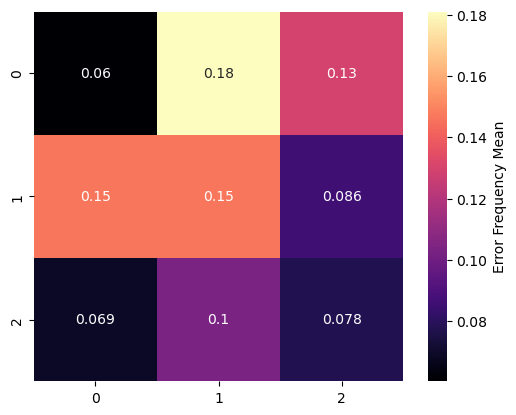

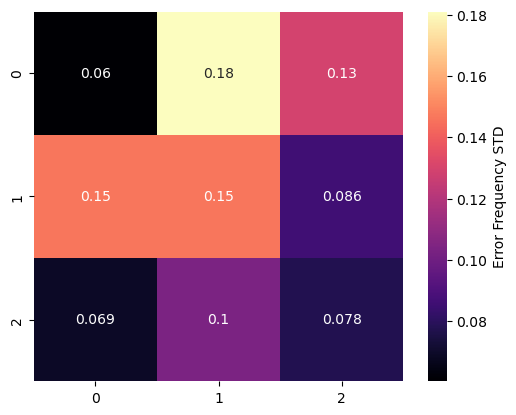

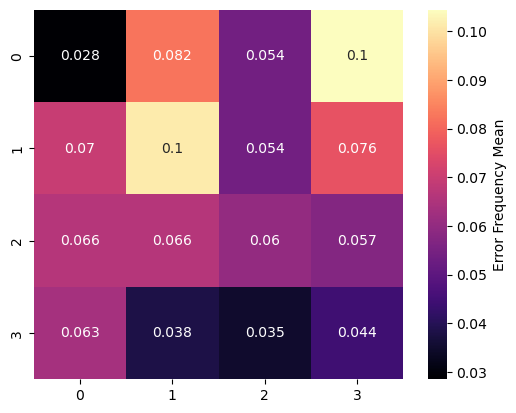

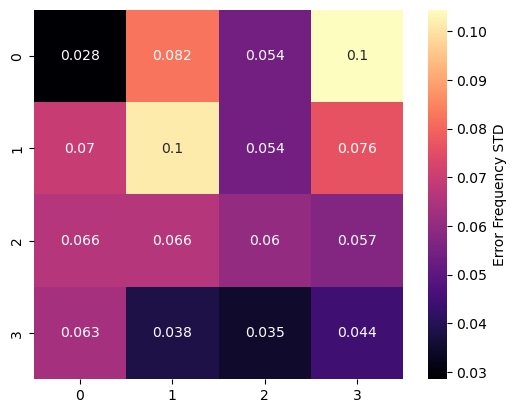

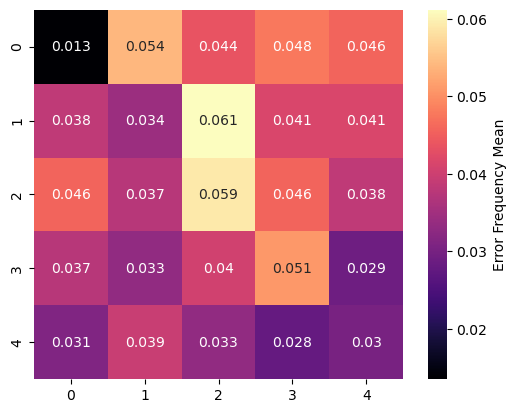

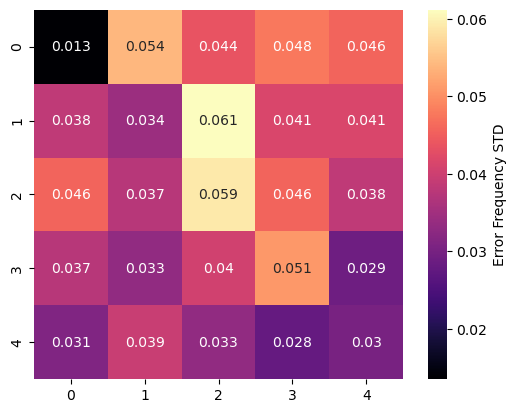

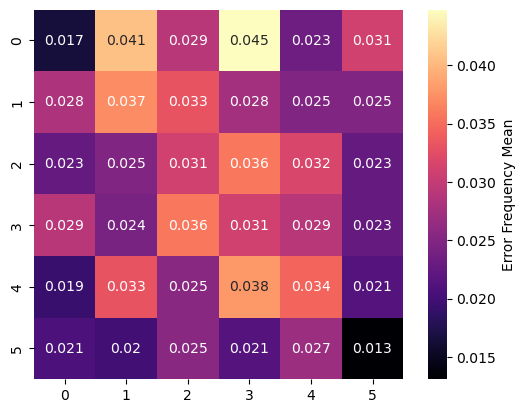

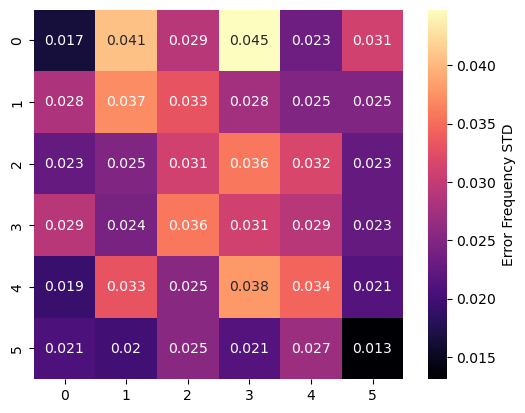

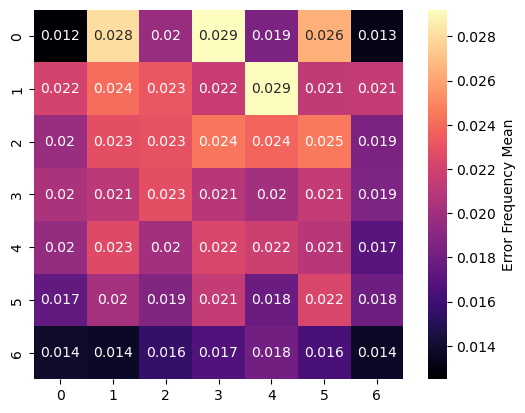

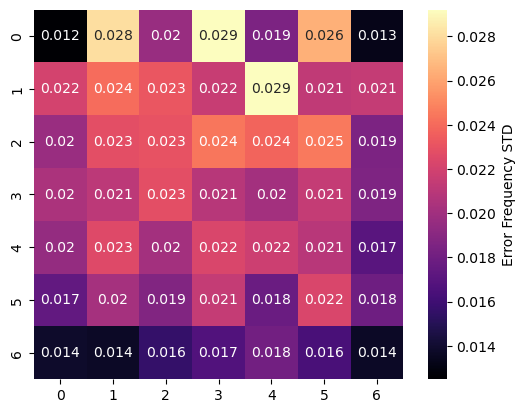

In [418]:
plot_error_location(df)

In [ ]:
def plot_error_location_diff(df):
    b_grouped = df.groupby('board_size')
    for board_size, b_group in b_grouped:
        p_grouped = pd.DataFrame(b_group).groupby('patient')
        N = int(np.sqrt(board_size))
        inputs = []
        for patient, p_group in p_grouped:
            m_df = p_group[p_group['match']==1]
            m_counts = np.bincount(m_df['tile_clicked'].to_numpy(), minlength=board_size)
            mm_df = p_group[p_group['match']==0]
            mm_counts = np.bincount(mm_df['tile_clicked'].to_numpy(), minlength=board_size)
            inputs.append(np.reshape((mm_counts/mm_counts.sum()) - (m_counts/m_counts.sum()), (N, N)))
        data = np.stack(inputs)
        plt.figure() 
        sns.heatmap(np.mean(data, axis=0), annot=False, cmap='coolwarm', square=True, cbar=True, cbar_kws={'label': 'Error Frequency Mean'})
        plt.figure() 
        sns.heatmap(np.std(data, axis=0), annot=False, cmap='coolwarm', square=True, cbar=True, cbar_kws={'label': 'Error Frequency STD'})

In [420]:
def plot_error_location_diff(df):
    b_grouped = df.groupby('board_size')
    for board_size, b_group in b_grouped:
        N = int(np.sqrt(board_size))
        m_df = b_group[b_group['match']==1]
        m_counts = np.bincount(m_df['tile_clicked'].to_numpy(), minlength=board_size)
        mm_df = b_group[b_group['match']==0]
        mm_counts = np.bincount(mm_df['tile_clicked'].to_numpy(), minlength=board_size)
        input = np.reshape((mm_counts/mm_counts.sum()) - (m_counts/m_counts.sum()), (N, N))
        plt.figure() 
        sns.heatmap(input, annot=False, cmap='coolwarm', square=True, cbar=True, cbar_kws={'label': 'Error Frequency Mean'})
        plt.figure() 
        sns.heatmap(input, annot=False, cmap='coolwarm', square=True, cbar=True, cbar_kws={'label': 'Error Frequency STD'})

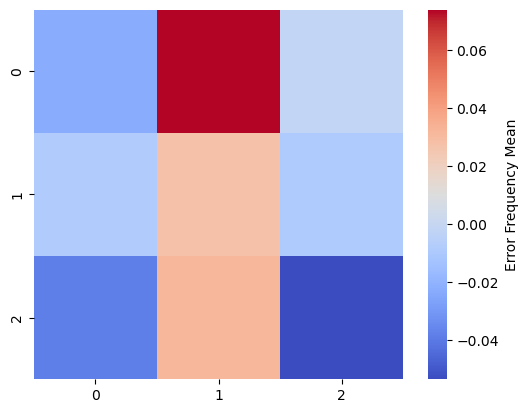

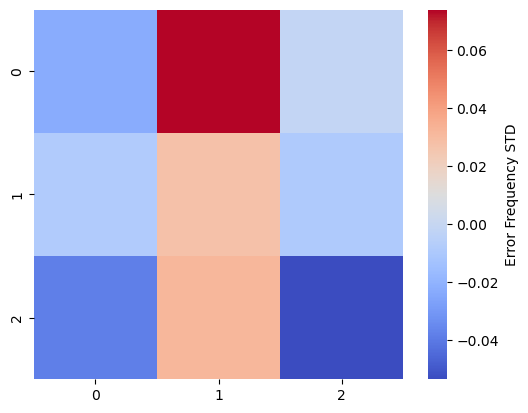

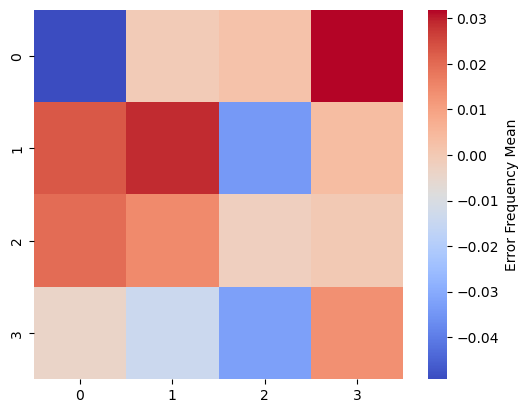

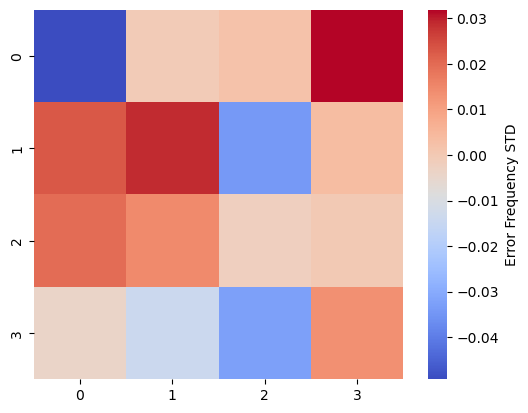

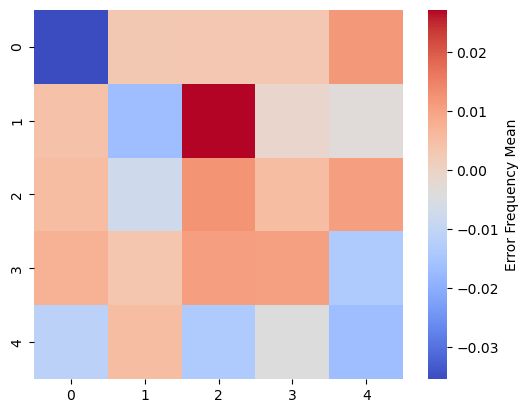

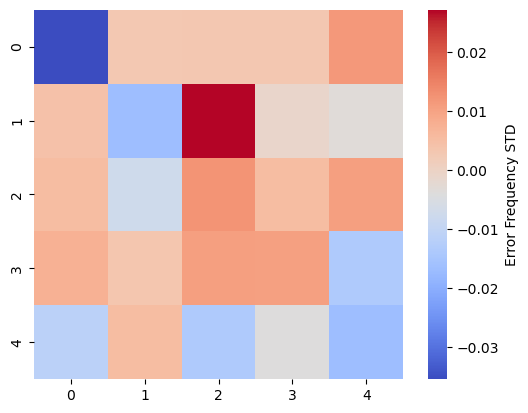

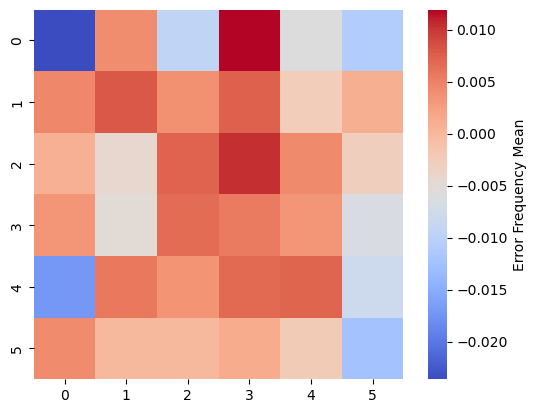

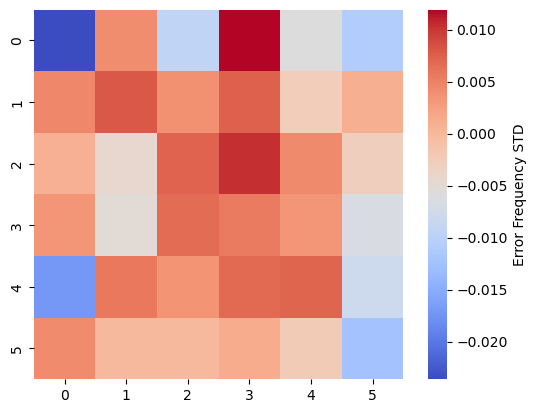

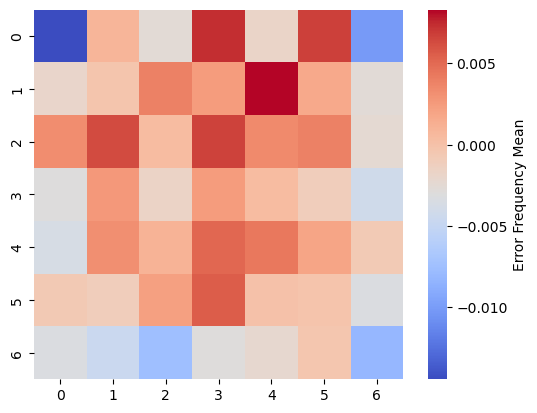

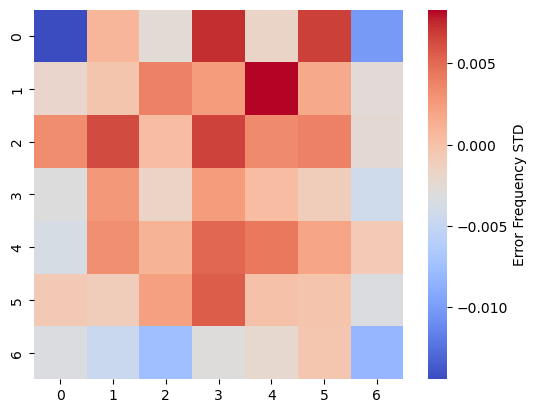

In [421]:
plot_error_location_diff(df)

# Positional distance

In [375]:
def euclidean_distance(row):
    N = int(np.sqrt(row['board_size']))
    # Convert 1D indices to 2D coordinates
    x1, y1 = np.unravel_index(row['tile_clicked'], (N, N))
    x2, y2 = np.unravel_index(row['correct_tile'], (N, N))
    
    # Compute Euclidean distance
    distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    
    return distance

In [395]:
def plot_error_distance(df):
    mm_df = df[df['match'] == 0]
    mm_df = mm_df[mm_df['correct_tile'] != -2]
    mm_df['distance'] = mm_df.apply(euclidean_distance, axis=1)
    mm_df['board_size'] = mm_df['board_size'].apply(np.sqrt)
    plt.figure(figsize=(8, 16))
    palette = ['grey']
    ax = sns.catplot(x="board_size", y="distance", data=mm_df, aspect=0.85, kind='bar', palette=palette)
    ax.set(xlabel="Board size", ylabel="distance-from-correct")
    plt.show()

<Figure size 800x1600 with 0 Axes>

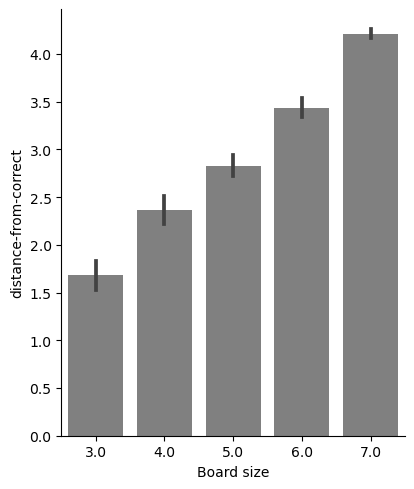

In [396]:
plot_error_distance(df)